# ARDUAIR: Procesamiento de datos PM10
Se procesan los datos para obtener un archivo CSV con los promedios hora de las lecturas de pm10  de las fechas 17, 18 y 19 de abril de 2017

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


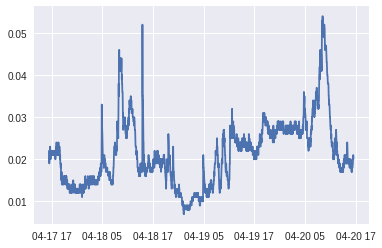

In [67]:
#Read
data=pd.read_csv('dusttrack_abr_17.csv',parse_dates=[['Date', 'Time']])
data['pm10_dusttrack']=data['AEROSOL mg/m^3']
data['datetime']=data['Date_Time']
data=data[['datetime','pm10_dusttrack']]
#aggregation
data1=data.groupby(pd.Grouper(key='datetime',freq='1h',axis=1)).mean()
data2=data.groupby(pd.Grouper(key='datetime',freq='2h',axis=1)).mean()
data3=data.groupby(pd.Grouper(key='datetime',freq='3h',axis=1)).mean()
# save
data1.to_csv('dusttrack_pm10_promedio_1h.csv')
data2.to_csv('dusttrack_pm10_promedio_2h.csv')
data3.to_csv('dusttrack_pm10_promedio_3h.csv')

# reset index
data=data.reset_index()

data
plt.plot(data.datetime, data.pm10_dusttrack)